In [46]:
from meep import mpb
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def band_gap(r):
    Si=mp.Medium(index=3.45)
    r=0.3
    geometry = [mp.Cylinder(r, material=mp.air)]
    geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                                     basis1=mp.Vector3(np.sqrt(3) / 2, 0.5),
                                     basis2=mp.Vector3(np.sqrt(3) / 2, -0.5))
    k_points = [mp.Vector3(),               # Gamma
                  mp.Vector3(y=0.5),          # M
                  mp.Vector3(-1 / 3, 1 / 3),  # K
                  mp.Vector3()]               # Gamma
    
    k_res=10
    k_points = mp.interpolate(k_res, k_points)
    
    resolution = 30
    num_bands=3
    ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution, default_material=Si)
    ms.run_te()
    freqs=np.transpose(ms.all_freqs)
    
    return ms

In [ ]:
objects=[]

for radius in np.arange(0.2,0.4,0.01):
    objects.append(band_gap(radius))

Initializing eigensolver data
Computing 3 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 30 x 30 x 1.
Solving for 3 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
34 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.045454545454545456, 0.0>
  Vector3<0.0, 0.09090909090909091, 0.0>
  Vector3<0.0, 0.13636363636363635, 0.0>
  Vector3<0.0, 0.18181818181818182, 0.0>
  Vector3<0.0, 0.2272727272727273, 0.0>
  Vector3<0.0, 0.2727272727272727, 0.0>
  Vector3<0.0, 0.

In [50]:
gaps=[]
for i in objects:
    gaps.append(i.gap_list)

In [52]:
objects

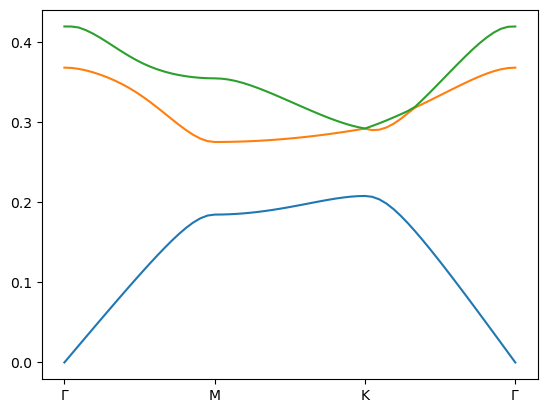

In [42]:
import matplotlib.pyplot as plt

upper=gap

for index in range(len(freqs)):
    plt.plot(range(len(k_points)),freqs[index])
    plt.xticks(ticks=range(0,len(k_points),k_res+1), labels=['$\Gamma$', 'M','K','$\Gamma$'])
    plt.axhline(y=upper,linestyle='--')
    plt.axhline(y=lower,linestle='--')

In [45]:
ob.gap_list

[(27.895275757342368, 0.207987316347778, 0.27540979494715195)]